<a href="https://colab.research.google.com/github/sr606/Rossmann-Sales-Prediction-Shraddha/blob/main/Rossmann_Sales_Prediction_Capstone_Project_Shraddha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In this Capstone Project.We are going to going to build a model using regression in Machine learning for forecasting the "Sales" column for the test set.
Let's first understand what is regression technique.
Regression analysis is a statistical method to model the relationship between a dependent (target) and independent (predictor) variables with one or more independent variables. More specifically, Regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed. It predicts continuous/real values such as temperature, age, salary, price, etc.

---




# **Important Libraries**





We will import other libraries as per our requirement.

In [ ]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### **Using Machine Learning to predict sales.**
Without proper sales forecasting, many business decisions are based on unreliable estimates or instinct – which leads to many inefficiencies and missed opportunities. with forecating we can answer Questions like.

How much stock should be ordered?
How much revenue can be expected in upcoming Year.?
## **What is sales forecasting?**
A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts, promo, Assortment of product etc.
Lets explore the dataset and coin out the features those will help our Model to predict the Sales of Rossmann stores with best Accuracy.

To begin we will first need to explore our dataset.
Let's import our csv files and convert into dataframes.
Here we have two datasets Rossmann Stores Data and stores which consist of information of stores and stores related aspects.

**Data Acquisition**

In [ ]:
#Loading files from google drive to colab and storing in a variable
File1="/content/drive/MyDrive/Colab Notebooks/Almabetter /Machine_Learning/Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/Colab Notebooks/Almabetter /Machine_Learning/store.csv"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Creating Dataframes from csv files
Rossmann_Stores_df=pd.read_csv(File1)
Store_df=pd.read_csv(File2)

# **Exploratory Data Analysis**

Let's perform simple tasks on our dataset and explore it more by usng different methods.

In [ ]:
#To display total number of rows and columns
Rossmann_Stores_df.shape

(1017209, 9)

In this dataset we can see rows are 1017209 and columns are 9.In all it is very huge data.

In [ ]:
#to display total number of rows and columns
Store_df.shape

(1115, 10)

In this dataset there are 1115 rows and 10 columns.As compared to previous dataset this is not that large amount of data.




In [ ]:
#To display names of column ,thier datatypes and missing values
Rossmann_Stores_df.info()
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

In [ ]:
#To overview statistics approach of numerical variables
Rossmann_Stores_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#To get the stastical analysis of our datasets
Store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
#To display first n number of rows
Rossmann_Stores_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
Store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
#To display last n number of rows
Rossmann_Stores_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
#To display last n number of rows
Store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Handling Missing Values

Let's begin with our Data Cleaning Process.



There might be some missing values in store dataset in the columns CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear and PromoInterval because total number of rows are 1115. Wheareas these columns don't have 1115 enteries.Let's perform some operations to make sure that there should not be any missing values.Handling missing values is very important because all machine learning models does not work with missing data and that will simply lead to error.

In [ ]:
#To check null values
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We saw that are missing values in our dataset but still performing isnull operation helps us to identify missing values more accurately and identifies the null values column if we missed it.

In [ ]:
#Handling missing values
Store_df['CompetitionDistance'] = Store_df['CompetitionDistance'].fillna(Store_df['CompetitionDistance'].median())
Store_df['CompetitionOpenSinceMonth'] = Store_df['CompetitionOpenSinceMonth'].fillna(Store_df['CompetitionOpenSinceMonth'].mode()[0])
Store_df['CompetitionOpenSinceYear'] = Store_df['CompetitionOpenSinceYear'].fillna(Store_df['CompetitionOpenSinceYear'].mode()[0])
Store_df.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

Here we handled missing data with simply filling them with their respective mode,mean and 0 values according to their type of data.

In [ ]:
#To check null values
Store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [ ]:
#To review the rows and columns of dataset
Rossmann_Stores_df.shape

(1017209, 9)

In [ ]:
#To print n enteries of the dataset
Store_df.sample(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
425,426,a,a,250.0,9.0,2013.0,0
375,376,a,a,160.0,8.0,2012.0,0
581,582,a,a,120.0,9.0,2013.0,0
973,974,a,a,150.0,3.0,2011.0,1
451,452,a,c,1850.0,8.0,2013.0,1
421,422,a,c,2880.0,9.0,2013.0,0
655,656,d,a,410.0,4.0,2009.0,1
217,218,a,c,640.0,9.0,2013.0,1
880,881,a,a,180.0,3.0,2008.0,1
212,213,d,c,4030.0,3.0,2014.0,1


Checking for duplicated items present in our dataset.

In [ ]:
#To Check duplicate values
dupes=Rossmann_Stores_df.duplicated()
dupes.sum()

0

**Numerical Variables**

In [ ]:
#To display total number of numerical values in the data
numerical_features=[feature for feature in Rossmann_Stores_df.columns if Rossmann_Stores_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Rossmann_Stores_df[numerical_features].head()


Number of numerical values: 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#For Columns in Store_df
numerical_features=[feature for feature in Store_df.columns if Store_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Store_df[numerical_features].head()

Number of numerical values: 7


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,c,a,1270.0,9.0,2008.0,0
1,2,a,a,570.0,11.0,2007.0,1
2,3,a,a,14130.0,12.0,2006.0,1
3,4,c,c,620.0,9.0,2009.0,0
4,5,a,a,29910.0,4.0,2015.0,0


Numerical features-Cutomers,Sales,etc.
Categorical Features :dayofWeek,StetHoliday,etc.
Above we have performed operations to understand distribution of numerical features.

In [ ]:
Rossmann_Stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# Handling Outliers

Start with our target variable as it is the
most important variable.

Then we will explore other Numerical based variables like Customers, competition distance and all.

This Data set have some geniune values which seems as outliers. so we will be working on only those values which is very impotant to remove and removal of those will does not affect or data set.

Further we will need to perform operation to check if their are any outliers and will need to remove them.

In [ ]:
#To check the no of zeros in sales column
(Rossmann_Stores_df['Sales']==0).sum()

172871

**Improving Target Varible(Sales) by removing all the zeros.**

In [ ]:
#To store values which are non-zeros in sales column
Rossmann_Stores_df=Rossmann_Stores_df[Rossmann_Stores_df.Sales !=0]

Distribution of sales(target variable)

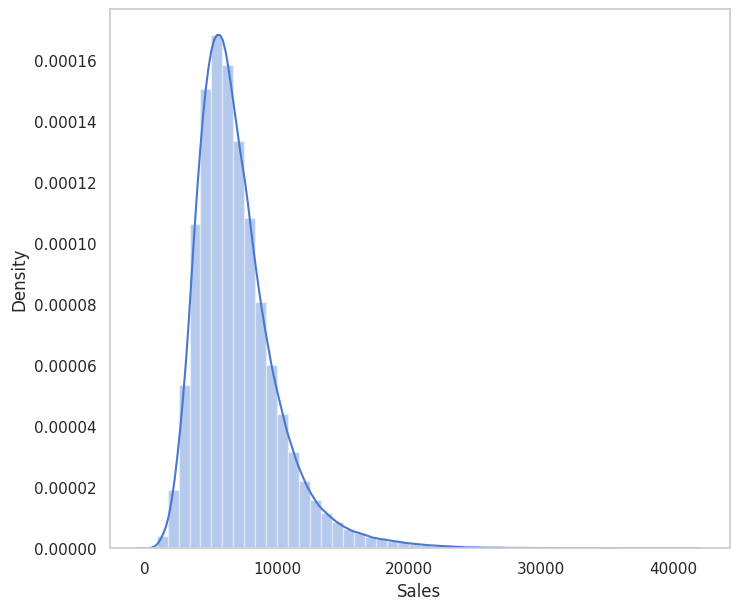

In [ ]:
#To find distribution of target variable(Sales)
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Sales'])
ax.grid(False)


Conclusion:Target variable is almost normally distributed.
We will know perform square-root for moderate skew which is sqrt(x) for positively skewed data,sqrt(max(x+1)-x) for negatively skewed data.

Here is some information about skewness from Source:Kaggle.
What is Data Skewness?
Data Skewness is asymmetry in a statistical distribution, in which the curve appears distorted or skewed either to the left or to the right. Skewness can be quantified to define the extent to which a distribution differs from a normal distribution.

Normal Distribution
In a normal distribution, the graph appears as a classical, symmetrical “bell-shaped curve.” The mean, or average, and the mode, or maximum point on the curve, are equal.


Types of Skewness
In a symmetric bell curve, the mean, median, and mode are all the same value. But in a skewed distribution, the mean, median, and mode are all different values.
A skewed data distribution or bell curve can be either positive or negative.

Positively Skewed Distribution
A positively skewed distribution means that the extreme data results are larger. This skews the data in that it brings the mean (average) up. The mean will be larger than the median in a Positively skewed distribution.


Negatively Skewed Distribution
A negatively skewed distribution means the opposite: that the extreme data results are smaller. This means that the mean is brought down, and the median is larger than the mean in a negatively skewed distribution.

Reducing skewness
A data transformation may be used to reduce skewness. A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. More specifically, a normal or Gaussian distribution is often regarded as ideal as it is assumed by many statistical methods.

Reducing Right Skewness
Right skewness can be reduced applying following transformation

Square root
The square root, x to x^(1/2) = sqrt(x), is a transformation with a
moderate effect on distribution shape: it is weaker than the logarithm
and the cube root. It is also used for reducing right skewness, and also
has the advantage that it can be applied to zero values. Note that the
square root of an area has the units of a length. It is commonly applied
to counted data, especially if the values are mostly rather small.

In [ ]:
Rossmann_Stores_df['Sales']=np.sqrt(Rossmann_Stores_df['Sales'])

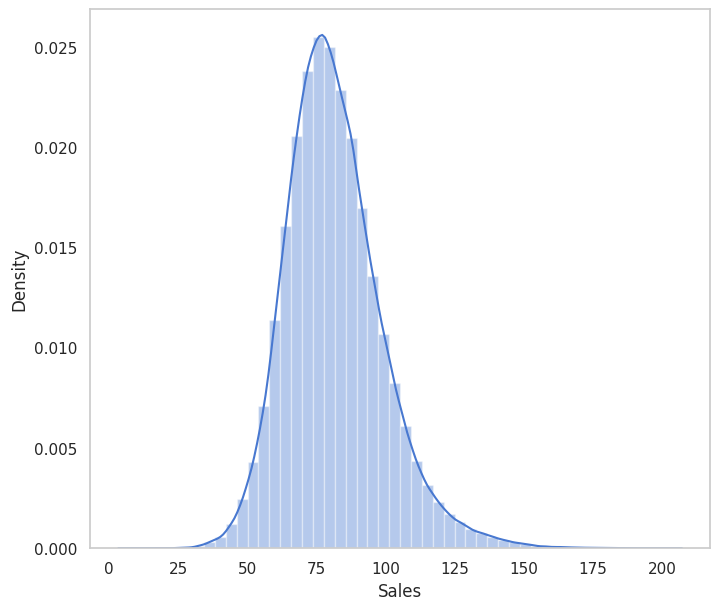

In [ ]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Sales'])
ax.grid(False)

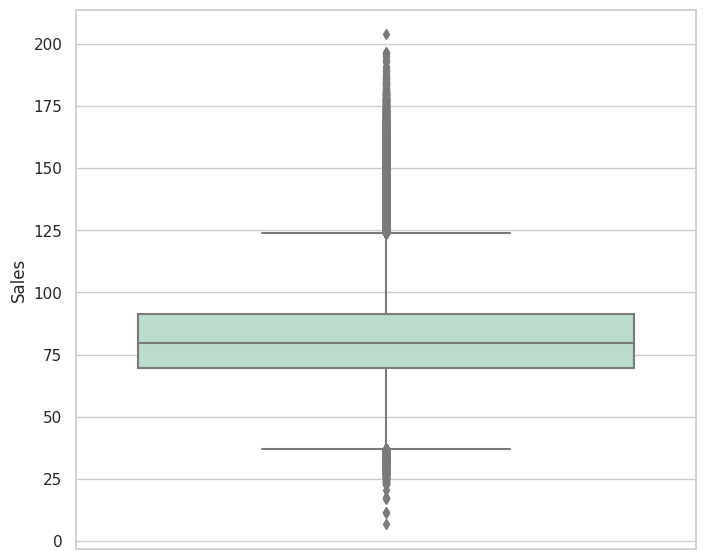

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Pastel2');
plt.show()

Let's remove the Outlier present in our target variable.

In [ ]:
percentile_25 = np.percentile(Rossmann_Stores_df['Sales'],25)
percentile_75 = np.percentile(Rossmann_Stores_df['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr

In [ ]:
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']<lower_outlier_bound].index,axis=0,inplace=True)


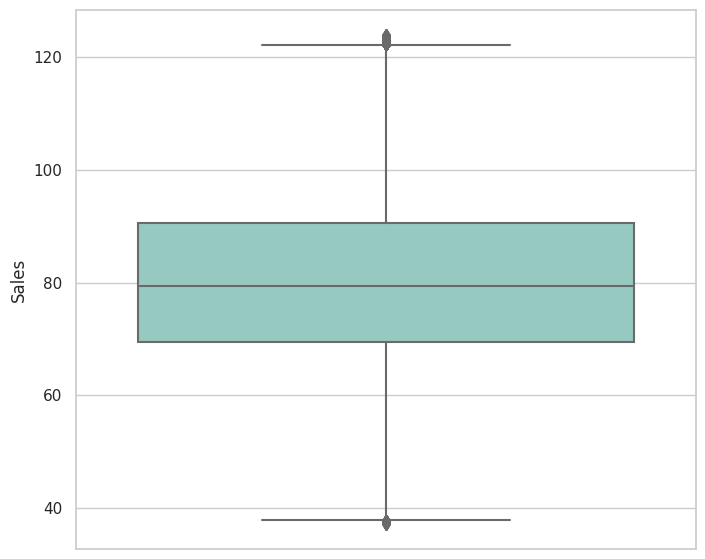

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Set3');
plt.show()

**Distribution of Customers**

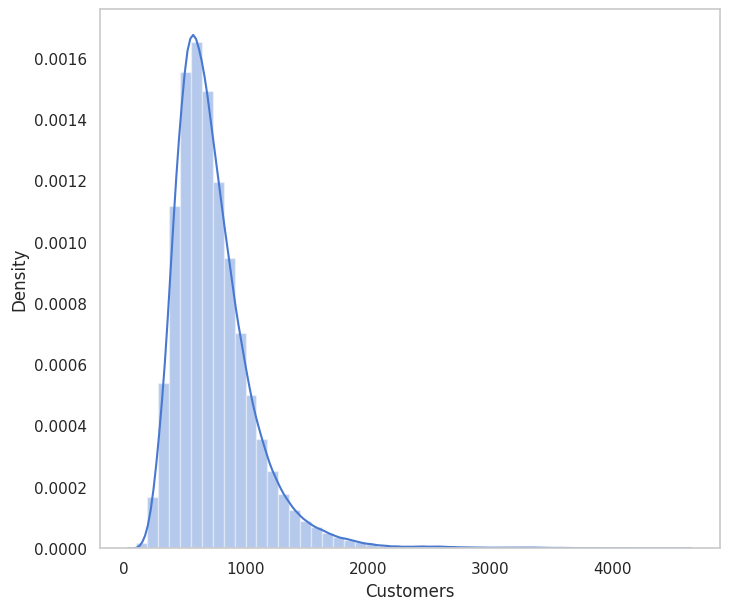

In [ ]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Customers'])
ax.grid(False)

In [ ]:
Rossmann_Stores_df['Customers'] = np.sqrt(Rossmann_Stores_df['Customers'])

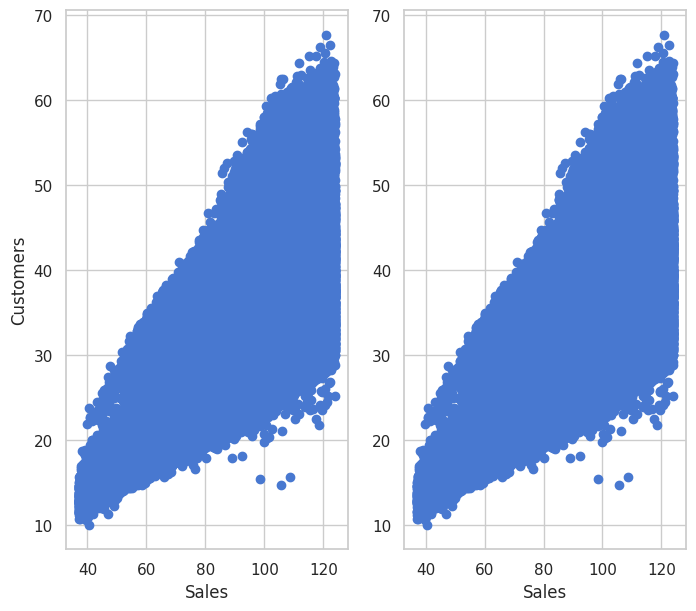

In [ ]:
# Scatter plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(Rossmann_Stores_df['Sales'], Rossmann_Stores_df['Customers'])
ax2.scatter(Rossmann_Stores_df['Sales'],Rossmann_Stores_df['Customers'])

# x-axis label
ax1.set_xlabel('Sales')
ax2.set_xlabel('Sales')

# y-axis label
ax1.set_ylabel('Customers')
plt.show()

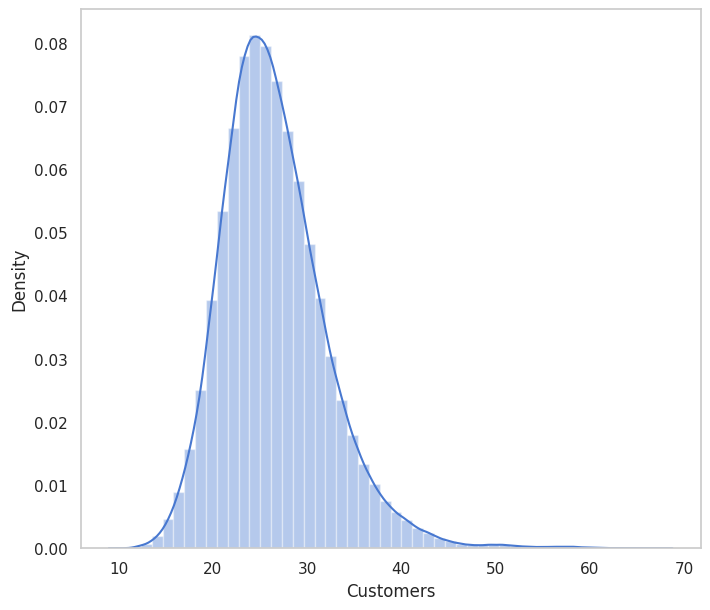

In [ ]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Customers'])
ax.grid(False)


**Distribution of CompetitionDistance**

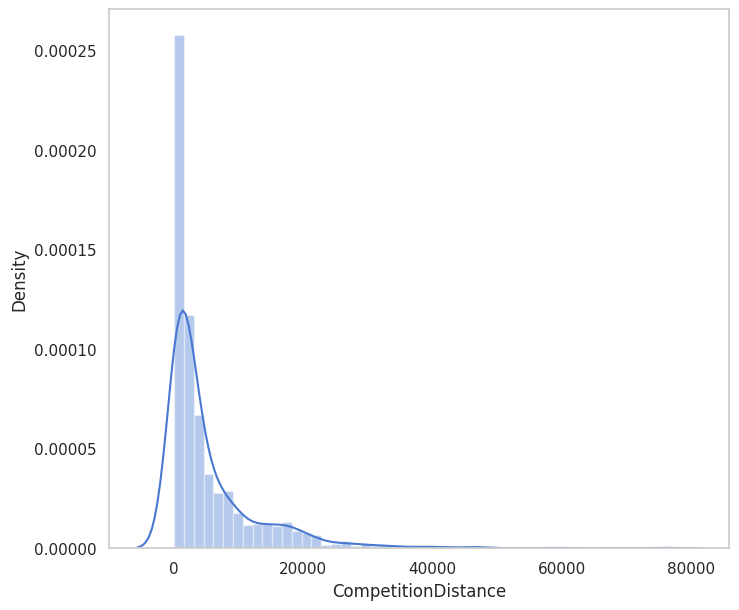

In [ ]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Store_df['CompetitionDistance'])
ax.grid(False)


In [ ]:
Store_df['CompetitionDistance'] = np.log(Store_df['CompetitionDistance'])

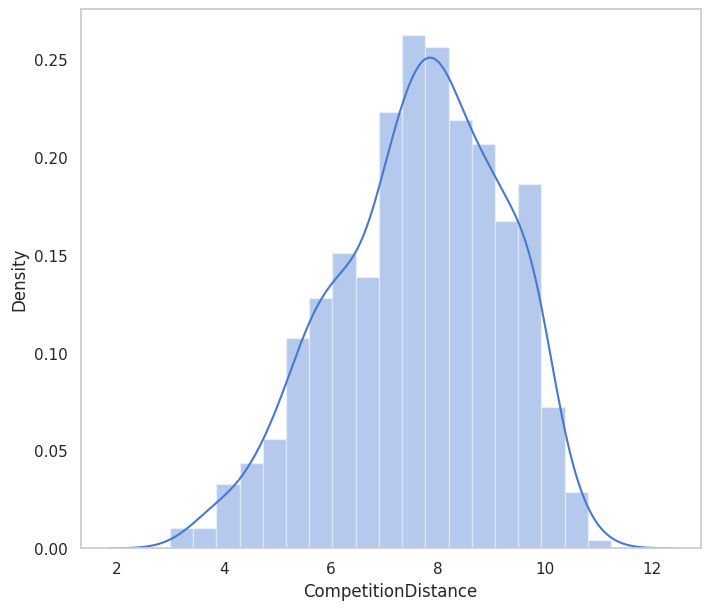

In [ ]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Store_df['CompetitionDistance'])
ax.grid(False)

CompetitionOpenSinceYear

In real world scenario it is possible to have these values as exceptionals.But for the ML algos and they may create problem.
This feature seems to have an outlier for the model.
Hence we remove only those values Removal of which does not affect the original data. And also which are at extreme point.

**Conclusion:-**
* We have turned our target variable into a normal Distribution which is one of the important Assumption for Regression model.
* **Great! Our Target variable is ready to train and test.**

# Merging DataSets

Creating a new Dataset with merging of two datasets to perform further operations Smoothly.

In [ ]:
#Merging of rossmann_Stores and Store_df
merged_df=pd.merge(left=Rossmann_Stores_df,right=Store_df ,how='left',on='Store')
merged_df.shape

(825571, 15)

 Categorical-Data

We have seen in the previous data analysis that there are some categorical data for the columns such as State holiday,School holiday,Store type,Assortment,etc.
Let's further analyse them.

In [ ]:
#To Review merged dataset before analysis it further
merged_df.sample(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
777079,583,5,2013-02-22,69.606034,21.679483,1,1,0,0,a,a,7.878534,11.0,2002.0,0
468496,546,4,2014-01-30,104.771179,36.878178,1,0,0,0,a,a,6.363028,1.0,2005.0,0
722156,305,3,2013-04-24,58.677082,19.026298,1,1,0,0,c,c,7.811973,2.0,2005.0,1
770179,295,5,2013-03-01,60.950800,23.280893,1,0,0,0,a,a,5.347108,11.0,2000.0,1
463209,652,3,2014-02-05,84.178382,26.115130,1,1,0,0,a,a,9.922800,9.0,2013.0,0
326568,187,2,2014-07-08,78.089692,27.221315,1,0,0,0,a,c,9.870964,9.0,2013.0,0
741491,994,4,2013-04-04,58.557664,19.544820,1,0,0,1,a,a,7.736307,7.0,2011.0,1
298759,1007,3,2014-08-13,72.883469,26.532998,1,0,0,1,c,c,8.338067,9.0,2012.0,0
525341,774,2,2013-11-26,74.786362,26.776856,1,0,0,0,a,c,6.461468,9.0,2013.0,0
124193,116,6,2015-03-14,78.701969,25.079872,1,0,0,0,a,a,6.522093,4.0,2013.0,0


In [ ]:
#To check datatypes of dataset
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                        float64
Customers                    float64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
dtype: object

Here we can see that there are columns like Date,StateHoliday,SchoolHoliday,Storetype,Assortment which are of datatypes object but in machine learning, algorithm works quite well with numerical data.
Let's perform some operation to make them work.

In [ ]:
#merged_df['StoreType'].value_counts()
merged_df['StoreType'].nunique()

4

# **Features Transformation**

In [ ]:
#Convert the a,b,c into 1 as they represent Holiday
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(int)

In [ ]:
merged_df['StateHoliday'].value_counts()

0    824798
1       773
Name: StateHoliday, dtype: int64

* **By doing the above Imputation and conversion we get a categorical values of 0 & 1 for StateHoliday.**

**Converting datetime object into year,week and month format.**




In [ ]:
#Converting date to datetime
merged_df['Date']=pd.to_datetime(merged_df['Date'])

In [ ]:
#checking datatype of Date
merged_df['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
#To convert date in year,month and week
merged_df['year']=merged_df['Date'].dt.year
merged_df['month']=merged_df['Date'].dt.month
merged_df['week']=merged_df['Date'].dt.week


In [ ]:
#Deleting the date column
del merged_df['Date']

* **We added 3 New Features into our Data set & removed 1 Feature Date.**

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'year', 'month', 'week'],
      dtype='object')

# EDA with Data Visualization

### **Analysing Categorical Type with Target Variable.**

**Affect of StateHoliday and SchoolHoliday over Sales**

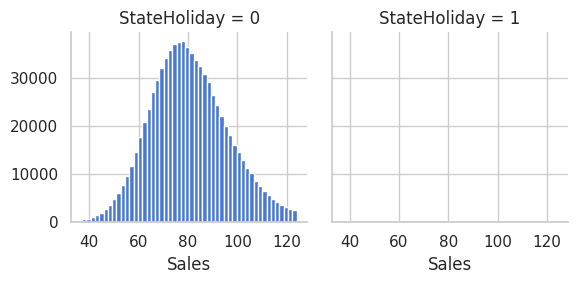

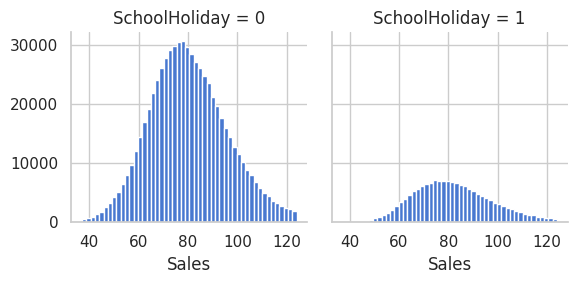

In [ ]:
g = sns.FacetGrid(merged_df, col='StateHoliday')
g.map(plt.hist, 'Sales',bins=50)
plt.show()

g = sns.FacetGrid(merged_df, col='SchoolHoliday')
g.map(plt.hist, 'Sales',bins=50)
plt.show()


Observation:-

During StateHolidays there is negligible sales records.
But we have some Sales records even during SchoolHolidays.
Findings:-

We can Eliminate StateHoliday feature from our traning model.

**Affect of CompetitionOpenSinceMonth over Sales**

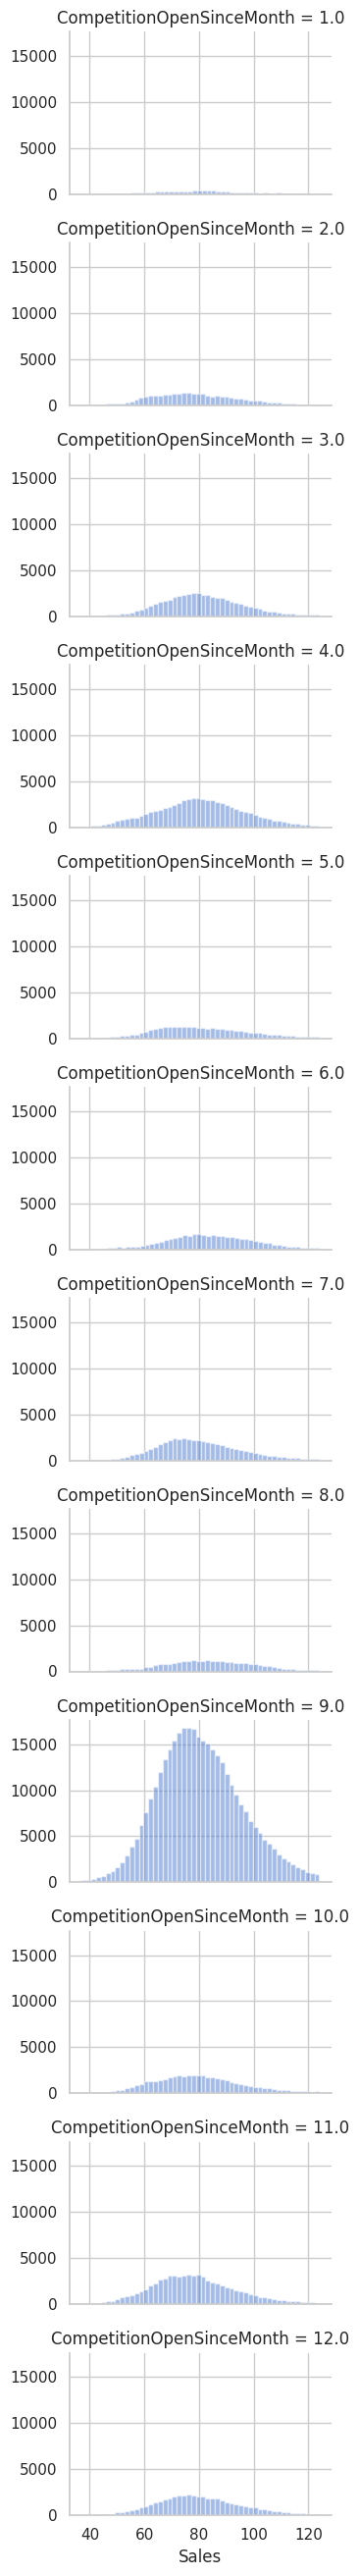

In [ ]:


grid = sns.FacetGrid(merged_df, row='CompetitionOpenSinceMonth', palette='Set3', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Sales', alpha=0.5, bins=50)
grid.add_legend()


**Effect of promo over Sales and Customers**

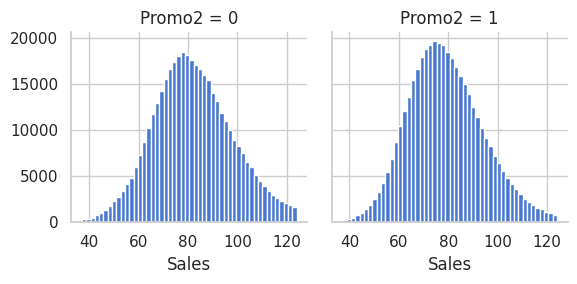

In [ ]:
g = sns.FacetGrid(merged_df, col='Promo2',palette='Set3')
g.map(plt.hist, 'Sales',bins=50)
plt.show()

Conclusion:Promo feature no able to impact sales and Customers as much it should be.

**Sales on Monthly Basis**

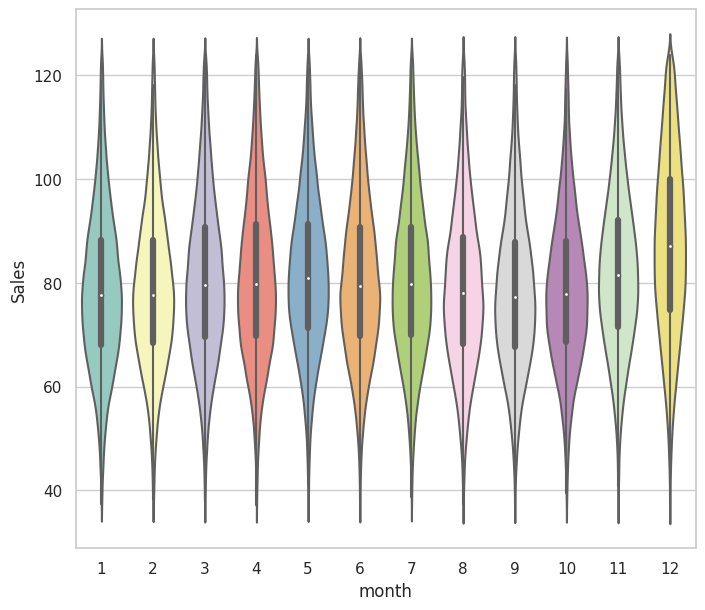

In [ ]:
#violinplot of month and sales
sns.set_theme(style='whitegrid')
ax=sns.violinplot(x='month',y='Sales',data=merged_df, palette='Set3')

**Sales on Yearly Basis**

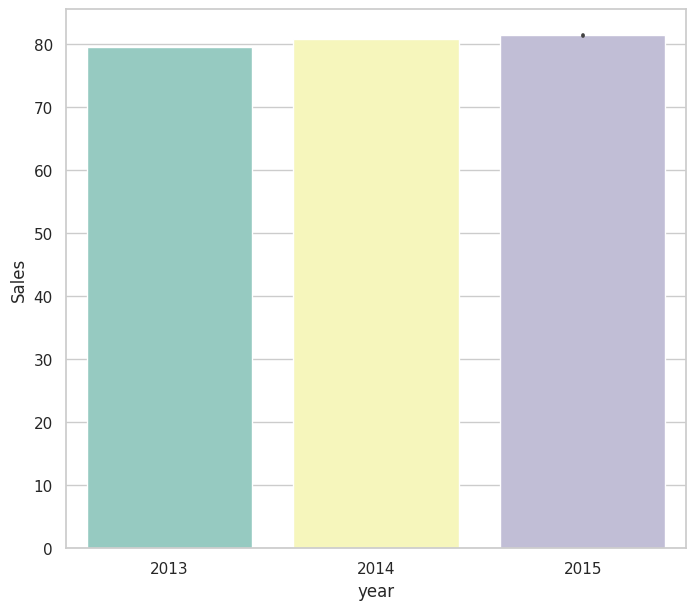

In [ ]:
#barplot of year and sales
sns.set_theme(style='whitegrid')
ax=sns.barplot(x='year',y='Sales',data=merged_df, palette='Set3')

**Sales on Weekly Basis**

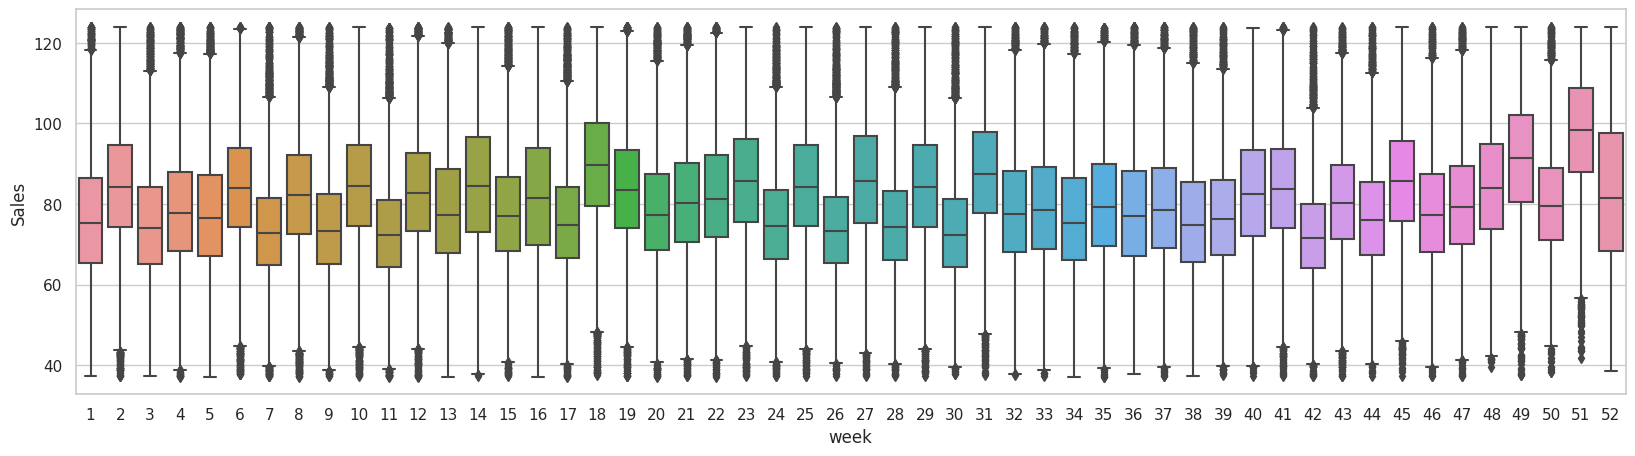

In [ ]:
#Weekly Basis
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20,5)})
ax=sns.boxplot(x='week',y='Sales',data=merged_df)

**Sales on Daily Basis**

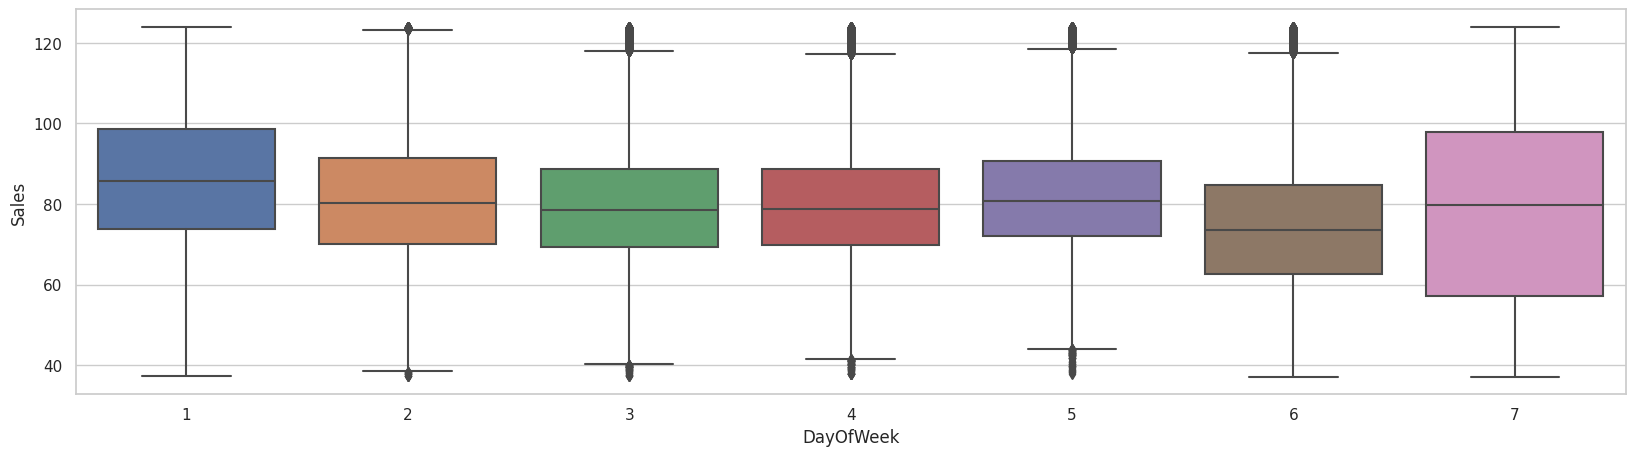

In [ ]:
#DayOfWeek vs Sales
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20,5)})
ax=sns.boxplot(x='DayOfWeek',y='Sales',data=merged_df)

**Findings:-**
* Sundays have negligible sales records.
* Monday(1) and Friday(5) have highest sales.
* Fridays have mavimum sales records.  
* Sales has declined in year 2015 compare to previous years.
* we can drop the sundays as it may create unbalance in the feature DayOfWeek.

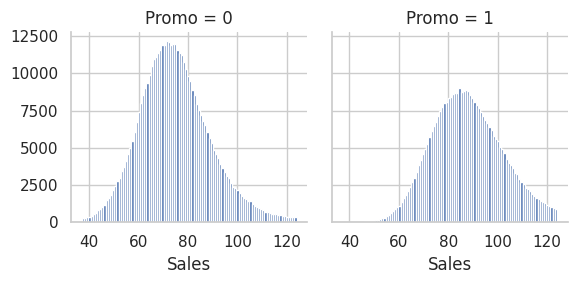

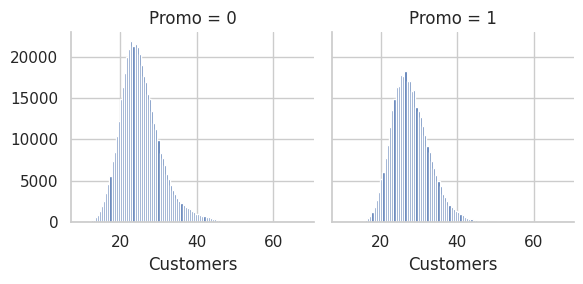

In [ ]:
#Promo vs Sales
g = sns.FacetGrid(merged_df, col='Promo',palette='Set3')
g.map(plt.hist, 'Sales',bins=100)
plt.show()
#Promo vs Customers
g = sns.FacetGrid(merged_df, col='Promo',palette='Set3')
g.map(plt.hist, 'Customers',bins=100)
plt.show()

**Observation**
* Promo feature not able to impact sales and Customers As much as it should be.

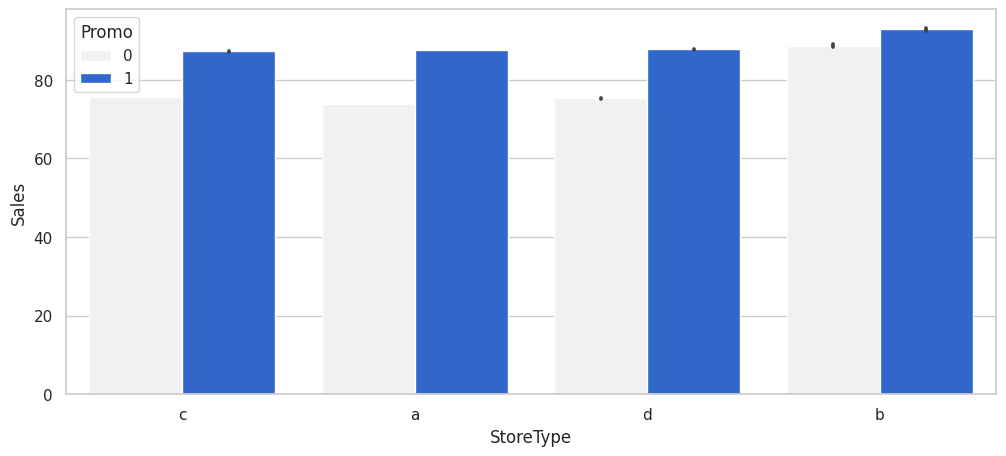

In [ ]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.barplot(x = 'StoreType',y = 'Sales',hue="Promo", data = merged_df,color='#175ee3')

# Show the plot
plt.show()

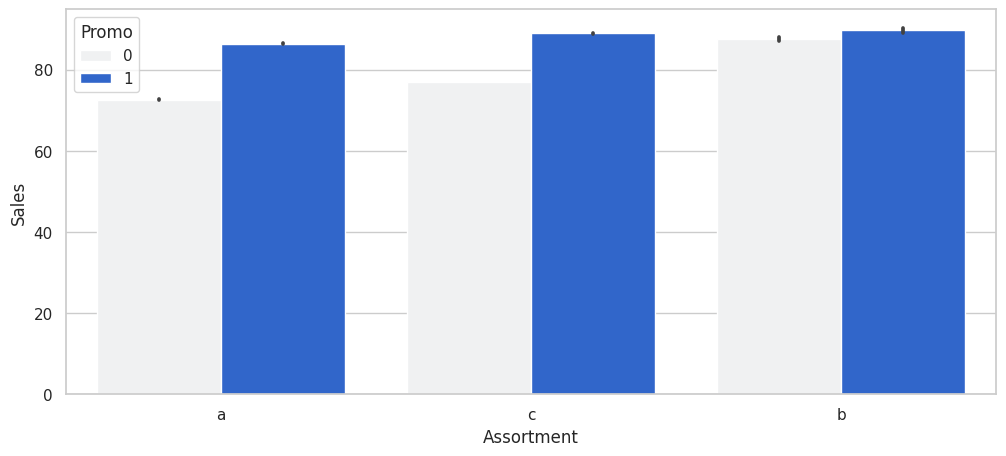

In [ ]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.barplot(x = 'Assortment',y = 'Sales',hue="Promo", data = merged_df,color='#175ee3')

# Show the plot
plt.show()

# Feature Selection for our Regression Model.

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Customers'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>,
        <Axes: title={'center': 'StateHoliday'}>,
        <Axes: title={'center': 'SchoolHoliday'}>],
       [<Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>,
        <Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'week'}>, <Axes: >]], dtype=object)

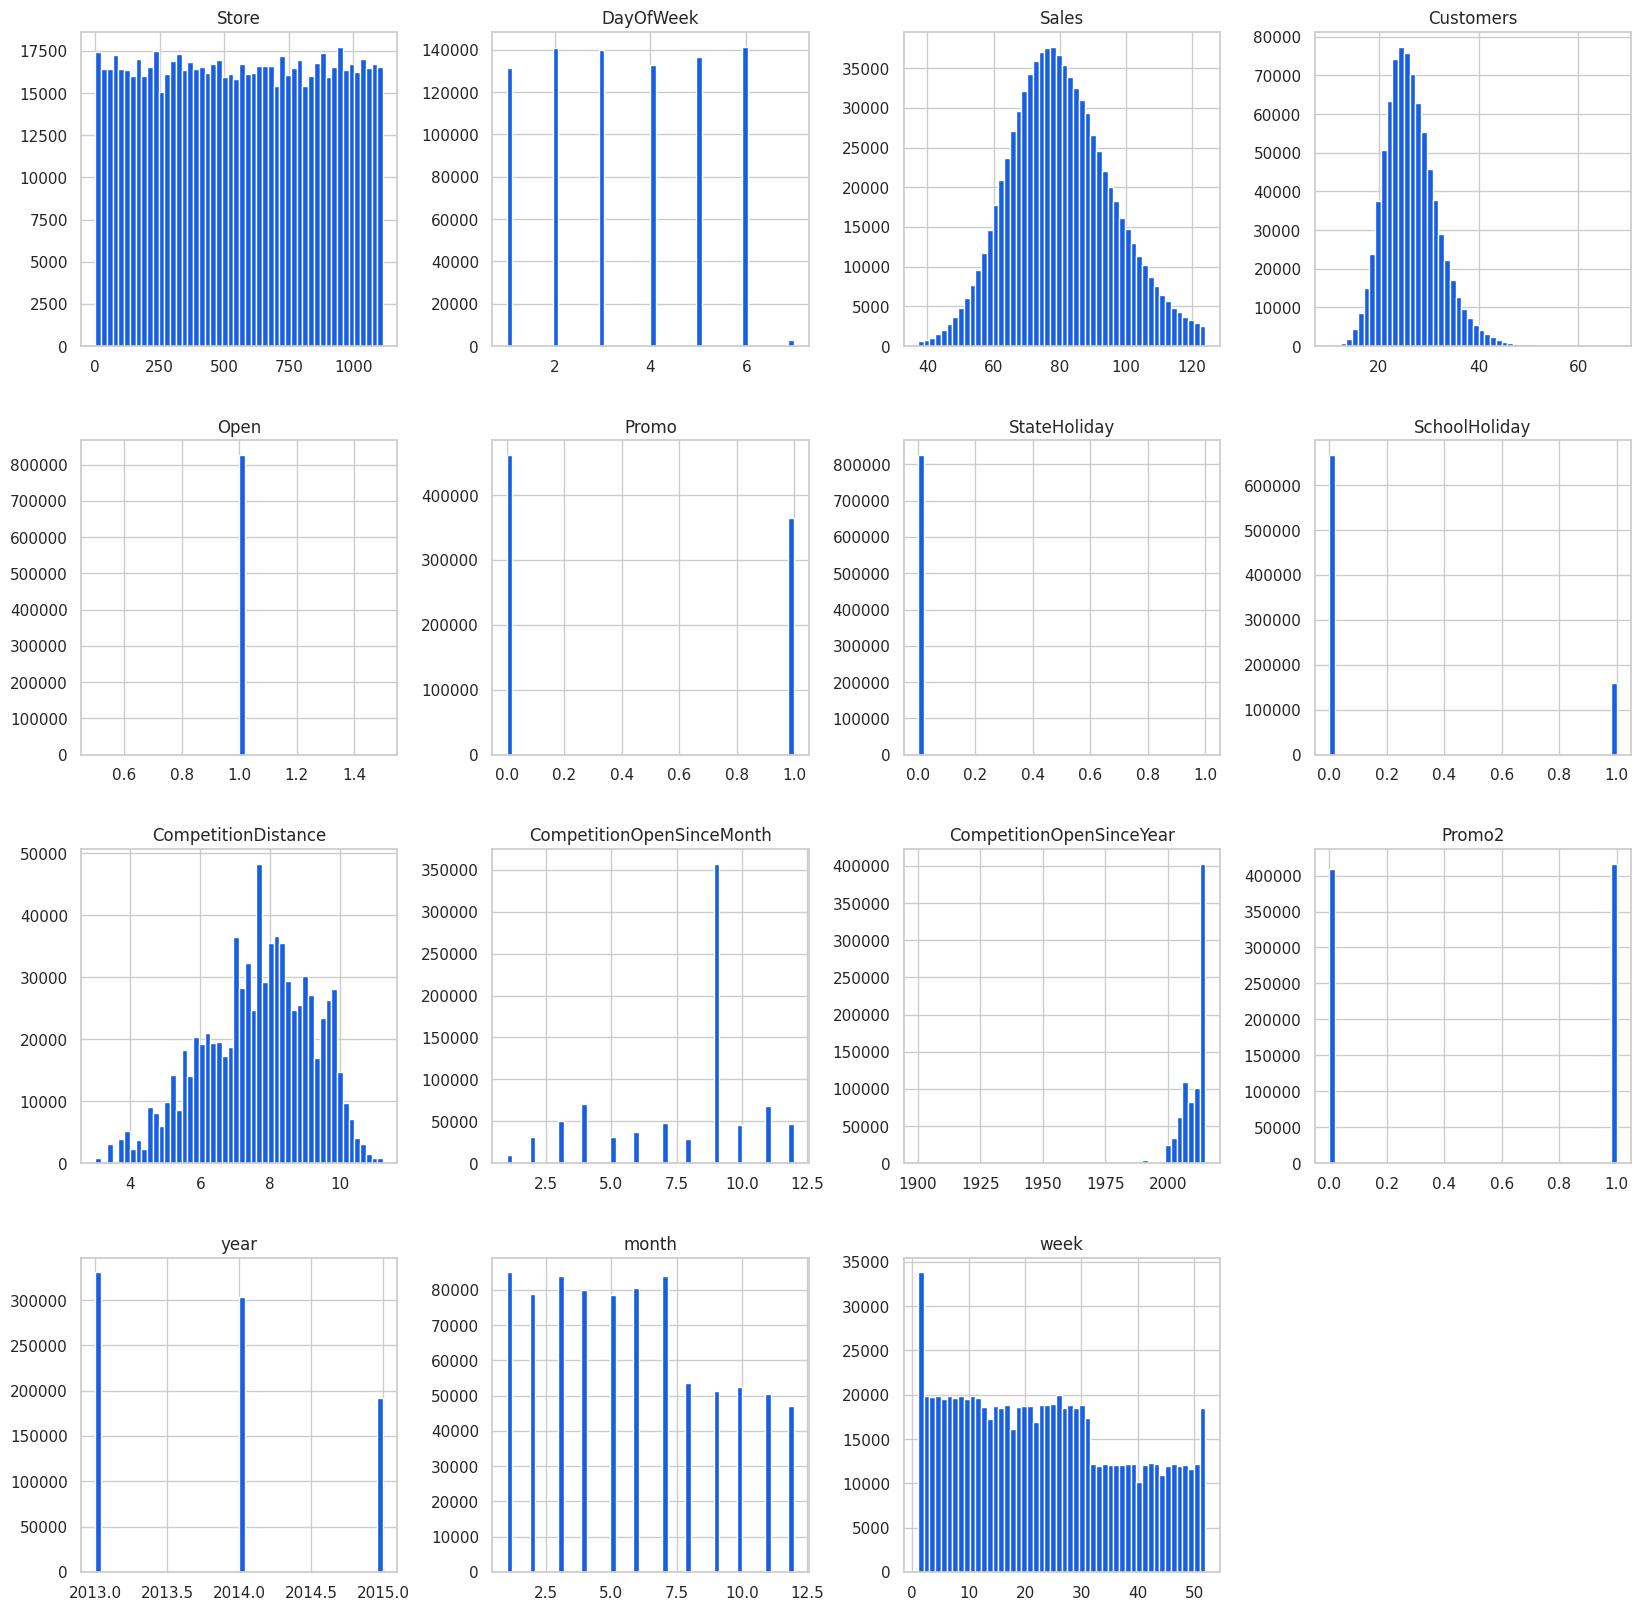

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

merged_df.hist(figsize = (20,20),bins=50,color='#175ee3')

# Assumptions in Regression

Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature.

1.There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s).
2.There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3.The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4.The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5.The error terms must be normally distributed.

**1.Linearity**

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

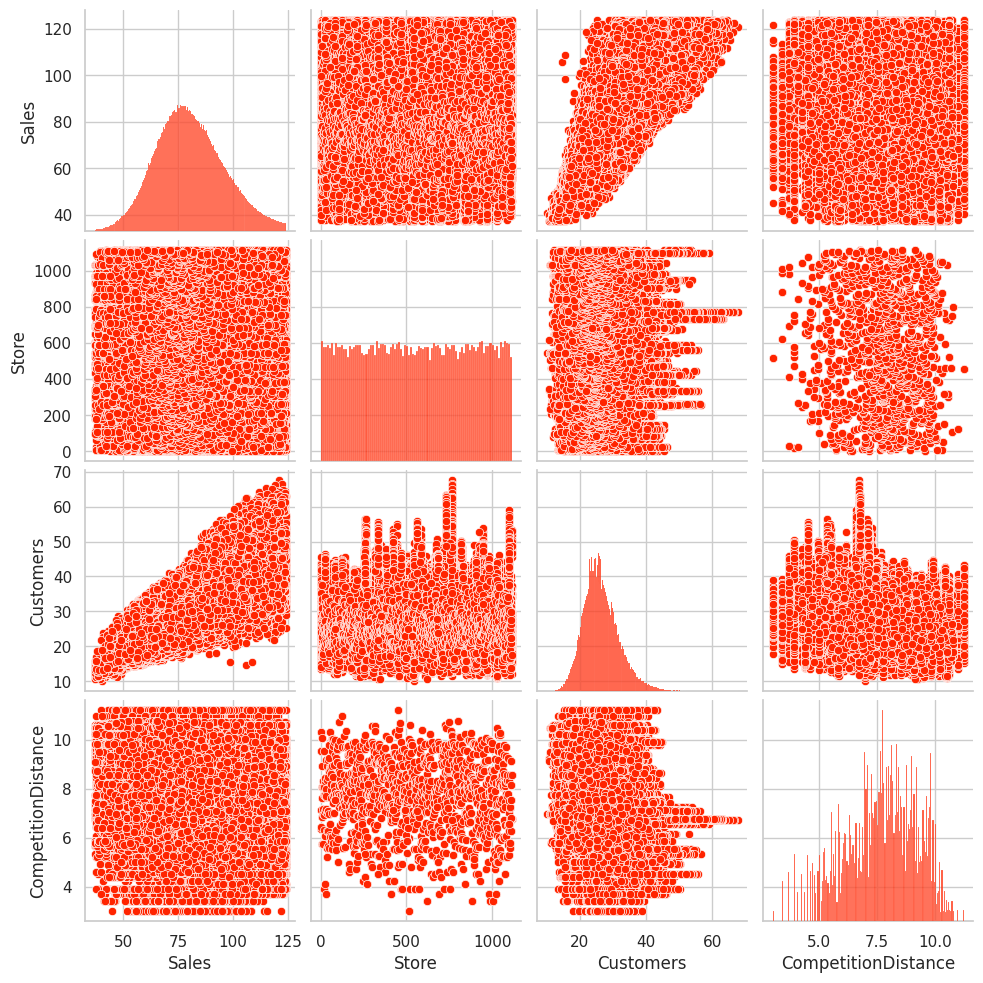

In [ ]:
Plot=merged_df[['Sales','Store', 'Customers','CompetitionDistance']]
sns.pairplot(Plot)
plt.show()

**Sales Vs Stores**

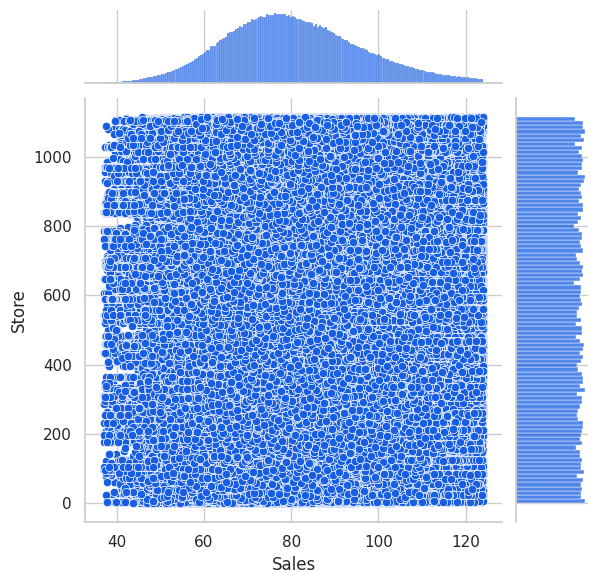

In [ ]:
#join plot for store vs sales
sns.jointplot(x='Sales',y ='Store', data = merged_df,color='#175ee3')
plt.show()

**Sales Vs Customers**

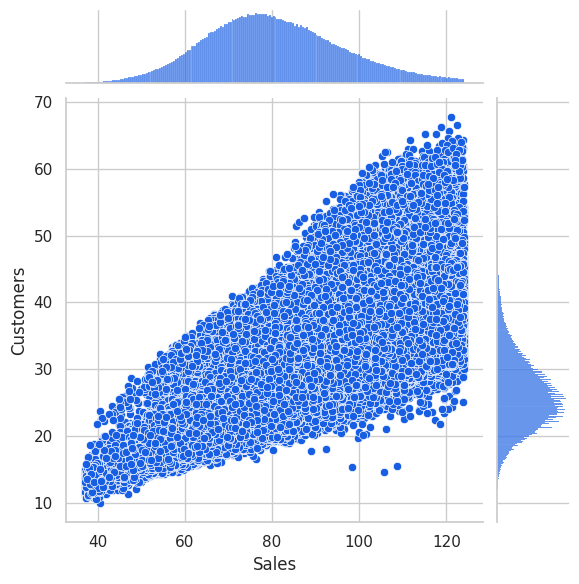

In [ ]:
#join plot for Sales Vs Customers
sns.jointplot(x='Sales',y ='Customers', data =merged_df,color='#175ee3')
plt.show()

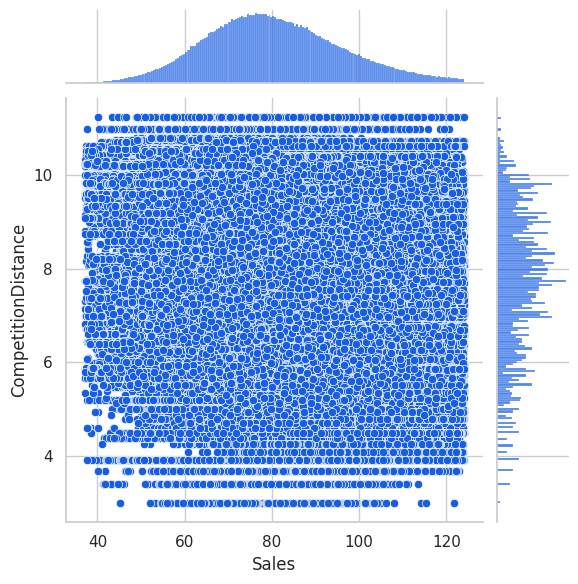

In [ ]:
#joinplot for sales vs CompetitionDistance
sns.jointplot(x='Sales',y ='CompetitionDistance', data =merged_df,color='#175ee3')
plt.show()

**Findings**
* By looking at the plots we can see that with the Sales variable none of the independent variables form an accurately lineear shape.
* So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

**2.Correlation and perfect multicollinearity**

* Correlation is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.
* In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.



### **One Hot Encoding**

In [ ]:
merged_df['Assortment'].nunique()

3

In [ ]:
merged_df['StateHoliday'].nunique()

2

Performing one hot encoding for the StoreType and Assortment.

In [ ]:
merged_df=pd.get_dummies(merged_df,columns=['StoreType','Assortment'])
#k-1 hot encoding
 #pd.get_dummies(df,columns=['Storetype','Assortment','StateHoliday'],drop_first=True)


In [ ]:
merged_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,year,month,week,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,72.546537,23.558438,1,1,0,1,7.146772,9.0,...,2015,7,31,0,0,1,0,1,0,0
1,2,5,77.871689,25.000000,1,1,0,1,6.345636,11.0,...,2015,7,31,1,0,0,0,1,0,0
2,3,5,91.181138,28.653098,1,1,0,1,9.556055,12.0,...,2015,7,31,1,0,0,0,1,0,0
3,4,5,118.300465,38.704005,1,1,0,1,6.429719,9.0,...,2015,7,31,0,0,1,0,0,0,1
4,5,5,69.440622,23.643181,1,1,0,1,10.305948,4.0,...,2015,7,31,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825566,682,2,58.094750,23.790755,1,0,1,1,5.010635,9.0,...,2013,1,1,0,1,0,0,1,0,0
825567,733,2,103.754518,48.754487,1,0,1,1,6.756932,10.0,...,2013,1,1,0,1,0,0,0,1,0
825568,769,2,70.957734,35.327043,1,0,1,1,6.733402,9.0,...,2013,1,1,0,1,0,0,0,1,0
825569,948,2,67.014924,32.233523,1,0,1,1,7.265430,9.0,...,2013,1,1,0,1,0,0,0,1,0


In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'year', 'month', 'week', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

### **Independent Variable Selection**

In [ ]:
select_df=merged_df[['DayOfWeek', 'Sales', 'Customers', 'Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceYear', 'Promo2',  'year', 'month','week',
                     'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'
]]

In [ ]:
#Corr map
correlation = select_df.corr()
correlation

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,year,month,week,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
DayOfWeek,1.000000,-0.183816,-0.118866,-0.281904,-0.138190,-0.001153,0.002101,-0.004353,0.001874,-0.016748,-0.011301,-0.002587,0.037669,-0.003893,-0.004460,-0.006189,0.025342,0.001297
Sales,-0.183816,1.000000,0.811582,0.408688,0.040792,-0.038029,0.005957,-0.101095,0.048173,0.062816,0.064231,-0.039988,0.078661,0.008402,0.015746,-0.115980,0.049162,0.106624
Customers,-0.118866,0.811582,1.000000,0.219628,0.029900,-0.277810,0.003014,-0.204656,0.003718,0.049387,0.050276,0.111678,0.332881,0.090437,-0.276374,-0.023250,0.300018,-0.034739
Promo,-0.281904,0.408688,0.219628,1.000000,0.029515,0.004933,-0.001129,0.002430,0.023797,-0.008769,0.004317,-0.000180,-0.022750,0.003330,0.003848,0.004640,-0.013277,-0.002078
SchoolHoliday,-0.138190,0.040792,0.029900,0.029515,1.000000,-0.003603,-0.000221,-0.007986,-0.039720,0.120486,0.081265,0.002203,-0.002728,0.002381,-0.003396,0.003962,-0.002194,-0.003543
CompetitionDistance,-0.001153,-0.038029,-0.277810,0.004933,-0.003603,1.000000,0.010152,-0.099680,-0.000953,0.000075,-0.000074,-0.173744,-0.081812,-0.095756,0.279712,-0.173661,-0.051616,0.183868
CompetitionOpenSinceYear,0.002101,0.005957,0.003014,-0.001129,-0.000221,0.010152,1.000000,-0.021043,0.001366,0.003677,0.003496,-0.035030,0.002071,-0.023946,0.054830,-0.089790,-0.000357,0.089975
Promo2,-0.004353,-0.101095,-0.204656,0.002430,-0.007986,-0.099680,-0.021043,1.000000,-0.005627,-0.024597,-0.023647,-0.071572,-0.046263,-0.000230,0.089680,-0.011831,-0.009176,0.013621
year,0.001874,0.048173,0.003718,0.023797,-0.039720,-0.000953,0.001366,-0.005627,1.000000,-0.268165,-0.253720,0.000580,0.001615,0.002284,-0.002743,-0.001772,-0.000434,0.001858
month,-0.016748,0.062816,0.049387,-0.008769,0.120486,0.000075,0.003677,-0.024597,-0.268165,1.000000,0.960791,0.004358,0.003879,0.005473,-0.009772,-0.007301,0.001172,0.007084


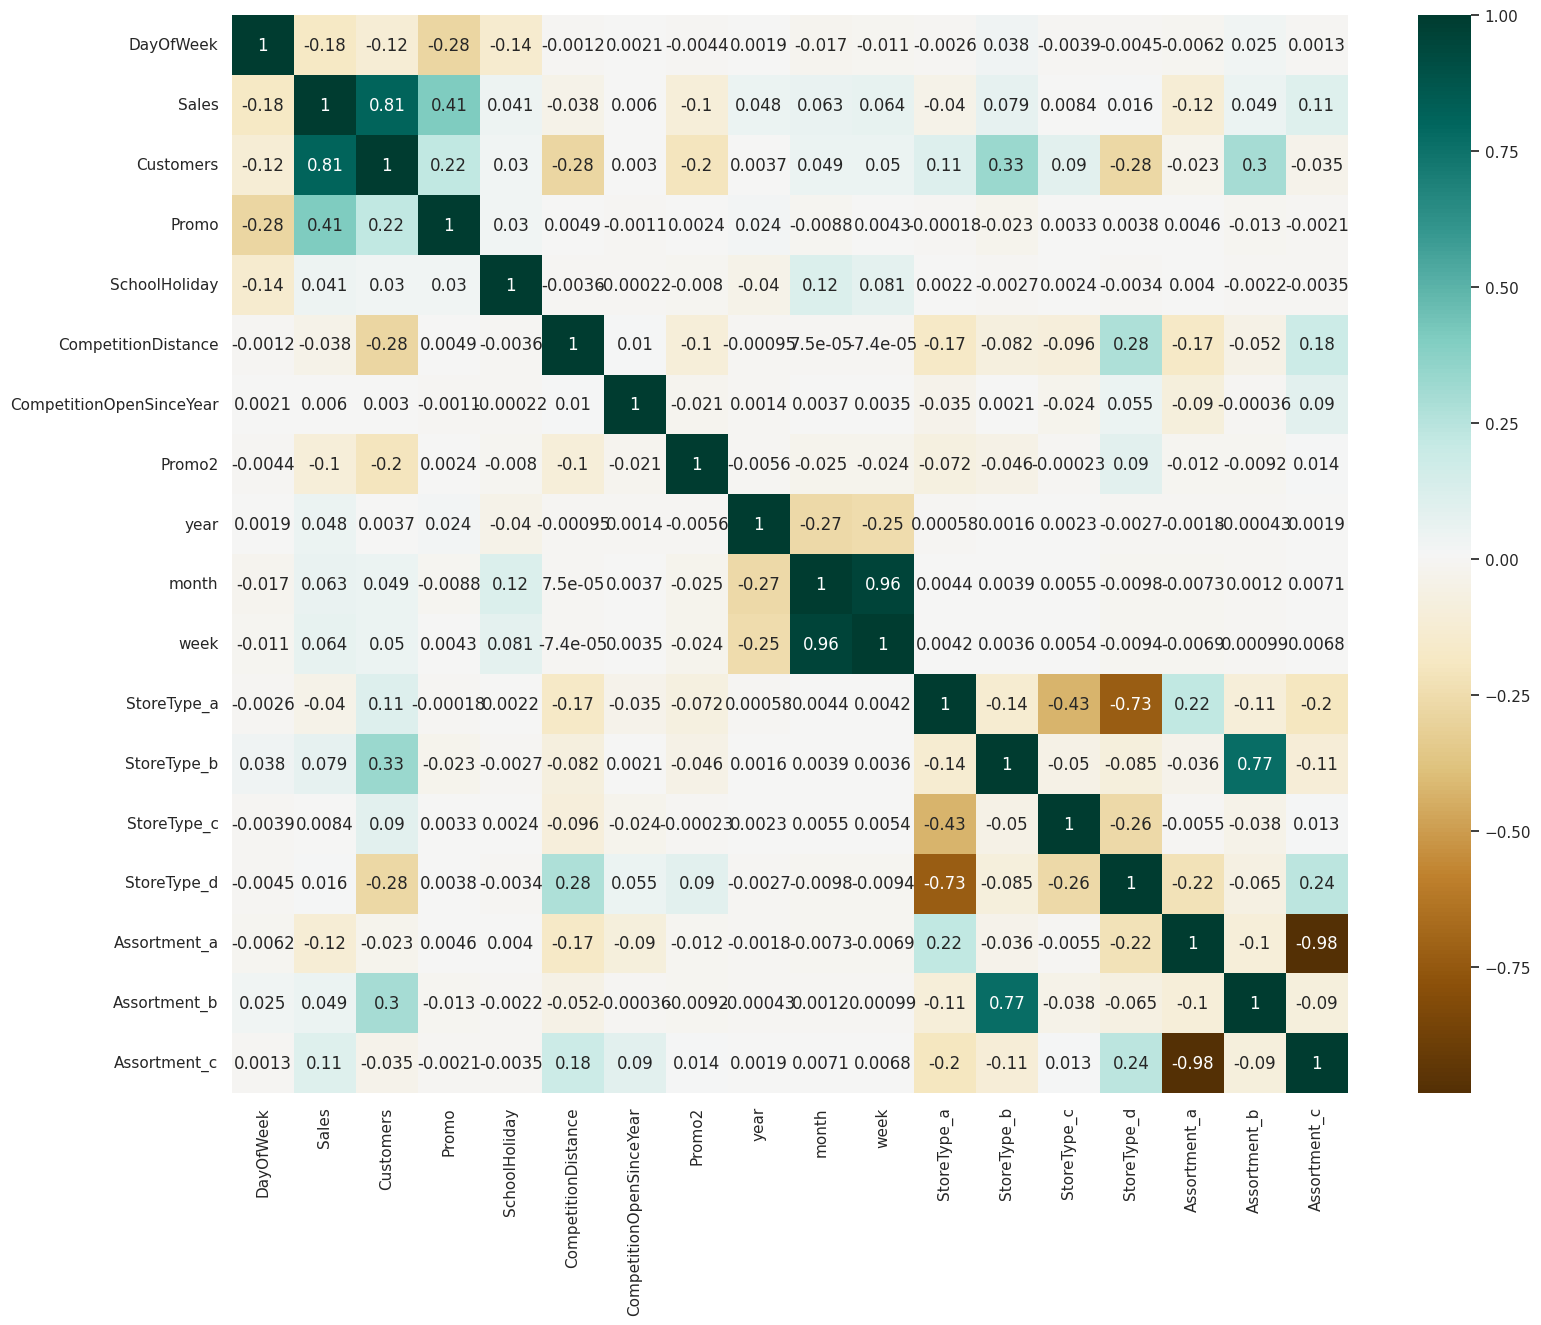

In [ ]:
# Heat Map
plt.figure(figsize=(18,14))
sns.heatmap(correlation, annot=True, linewidths=0.0, cmap='BrBG')
plt.show()

**Conslusion**
* Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model.


In [ ]:
final_df=select_df[['DayOfWeek', 'Sales', 'Customers','SchoolHoliday', 'CompetitionDistance',
                     'CompetitionOpenSinceYear', 'Promo2', 'year', 'month', 'week']]

# **Building Regression Model**

Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:

**Linear Regression Model**

In [ ]:
from sklearn import metrics
#Evaluate Metrics
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


In [ ]:
select_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceYear', 'Promo2', 'year',
       'month', 'week', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [ ]:
#Fitting the linear model
x=select_df.drop(['Sales'],axis=1)
y=merged_df['Sales']

**Train Test Split**

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit and transform the scaler on your training data
X_train_scaled = scaler.fit_transform(X_train)

# Fit the linear regression model on the scaled training data
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
DayOfWeek,-1.023833e-01
Customers,1.494836e+01
Promo,2.956780e+00
SchoolHoliday,6.550698e-02
CompetitionDistance,2.438893e+00
CompetitionOpenSinceYear,-1.854744e-01
Promo2,1.363878e+00
year,7.883376e-01
month,8.048307e-01
week,-2.827215e-01


In [ ]:
pred = lin_reg.predict(X_test)

In [ ]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 10719076546468.47
MSE: 1.1563961823600412e+26
RMSE: 10753586296487.518
R2 Square -4.781418957647798e+23
__________________________________
Train set evaluation:
_____________________________________
MAE: 10720464215352.668
MSE: 1.1565994560008567e+26
RMSE: 10754531398442.504
R2 Square -4.765214948172296e+23
__________________________________


**2. Mean of Residuals**

* Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [ ]:
#Finding mean of Residuals
residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -10720464215352.668


**Note:-**Very close to zero so all good here.

**4. Check for Normality of error terms/residuals**

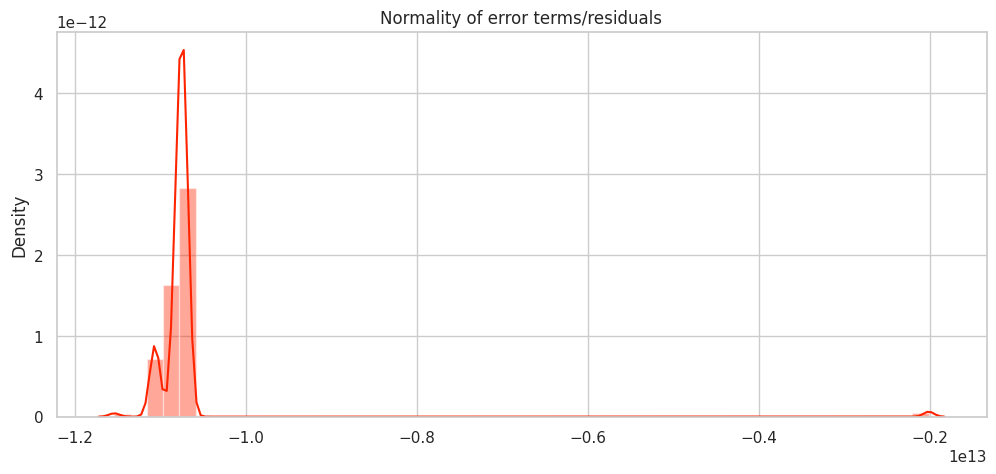

In [ ]:
#Distplot for Normality of error terms/residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.**

**Conclusion:-**
* Over Data is as such that our Linear model is not able to performe well in it.
* Apply cross validation and check different accuracy.


#CROSS VALIDATION
* As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
Cross Validation (CV)

* K folds = K fold CV.

* When K is increase, computationally cost is increase
* cross_val_score(LR_model,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)

In [ ]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5



cv_result = cross_val_score(lin_reg,x,y,cv=k) # uses R^2 as score
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.82867928 0.84103192 0.84174998 0.83864072 0.84044302]
CV scores average:  0.8381089844880533


#Regularized Regression with Hyper parameter Tunning.
**As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.**

**Ridge regression:** First regularization technique. Also it is called L2 regularization.
* Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
alpha is parameter we need to choose to fit and predict. alpha is hyperparameter that we need to choose for best accuracy and model complexity. **This process is called hyperparameter tuning.**
* What if alpha is zero? lost function = OLS so that is linear rigression
* If alpha is small that can cause overfitting
* If alpha is big that can cause underfitting.

**Lasso regression:** Second regularization technique. Also it is called L1 regularization.
* Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
* It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression




# **Lasso Regression**

**Models**
Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score




lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
zw=print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 4.905399442234294
MSE: 38.72913332755119
RMSE: 6.2232735218332795
R2 Square 0.8398643863319439
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.906528166795819
MSE: 38.72173143179024
RMSE: 6.222678798699981
R2 Square 0.8404656231848139
__________________________________
The best fit alpha value is found out to be : {'alpha': 1e-08}


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 4.9053994431444385
MSE: 38.729133323936445
RMSE: 6.223273521542858
R2 Square 0.8398643863468901
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.906528167685471
MSE: 38.721731431790275
RMSE: 6.222678798699984
R2 Square 0.8404656231848138
__________________________________


## **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet

Elastic = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
Elastic.fit(X_train, y_train)

test_pred = Elastic.predict(X_test)
train_pred = Elastic.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)



Test set evaluation:

MAE: 5.035047830194085
MSE: 42.0997558215393
RMSE: 6.488432462585959
R2 Square 0.8259276762859651
__________________________________
Train set evaluation:

MAE: 5.038694639633549
MSE: 42.1376352769591
RMSE: 6.491350805260728
R2 Square 0.8263920249481346
__________________________________


## **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 2.769790565006752
MSE: 14.63177880926365
RMSE: 3.8251508217668557
R2 Square 0.9395011280304102
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.446690002285013e-05
MSE: 0.0001592416698229139
RMSE: 0.01261909940617451
R2 Square 0.9999993439208522
__________________________________


**Observation:-**
The decision tree regressor performing well compared to Linear

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {  'bootstrap': [True], 'max_depth': [5], 'max_features': ['log2'], 'n_estimators': [50],'max_samples':[0.8]}
rfr = RandomForestRegressor(random_state = 1)

random_forest_model= GridSearchCV(estimator = rfr, param_grid = param_grid,

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

# # Fit the object to train dataset
random_forest_model.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5],
                         'max_features': ['log2'], 'max_samples': [0.8],
                         'n_estimators': [50]},
             return_train_score=True)

In [ ]:
test_pred = random_forest_model.predict(X_test)
train_pred = random_forest_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 6.602681263265551
MSE: 70.91819813662237
RMSE: 8.421294326682945
R2 Square 0.7067703766362883
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.606011635733475
MSE: 71.03835539523108
RMSE: 8.428425439857143
R2 Square 0.7073204286353386
__________________________________


**Observation:**
Random Forest regressor has the best result as compared to other models, which means it is better at predicting sales than other models.

#Understanding the important features

In [ ]:
# features used
columns = list(X_train.columns)
columns

['DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceYear',
 'Promo2',
 'year',
 'month',
 'week',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [ ]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.best_estimator_.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
1,Customers,0.731882
2,Promo,0.156936
0,DayOfWeek,0.029890
13,StoreType_d,0.018517
10,StoreType_a,0.011422
4,CompetitionDistance,0.010217
14,Assortment_a,0.008698
9,week,0.007269
8,month,0.006242
16,Assortment_c,0.006229


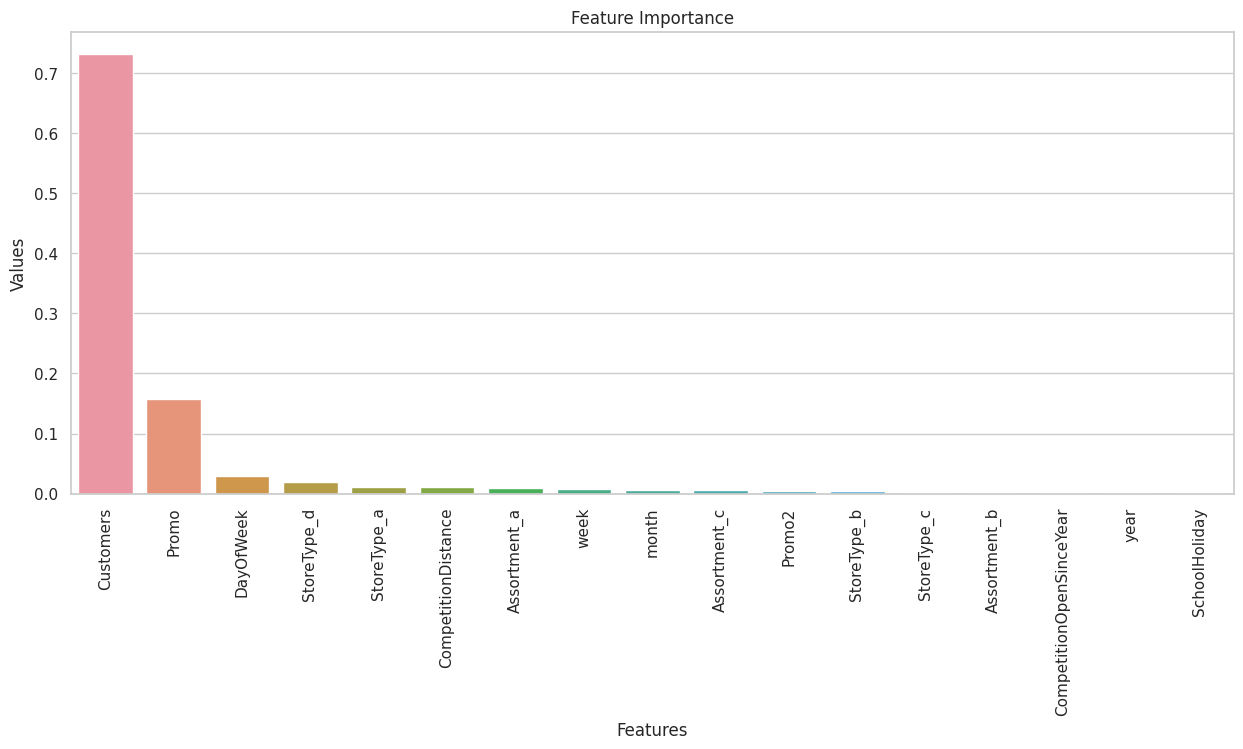

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

In [ ]:
LR=round(lin_reg.score(X_train,y_train)*100,2)

Rg=round(ridge.score(X_train,y_train)*100,2)
Elas=round(Elastic.score(X_train,y_train)*100,2)
Dt=round(DT_model.score(X_train,y_train)*100,2)
Rf=round(random_forest_model.score(X_train,y_train)*100,2)

In [ ]:
from sklearn import metrics
ls2=round(metrics.r2_score(y_train,lasso_regressor.predict(X_train))*100,2)
ls2

84.05

In [ ]:
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression','Ridge_Regression',
              'Elastic_Net', 'Desicion-Tree_Regression', 'Random_Forest'],
    'Score': [LR,ls2,Rg,Elas,Dt,Rf]})
#models.sort_values(by='Score')
#models
models.sort_values(by='Score',ascending=False)
#df=pd.DataFrame(models)

,Model,Score
4,Desicion-Tree_Regression,1.000000e+02
1,Lasso_Regression,8.405000e+01
2,Ridge_Regression,8.405000e+01
3,Elastic_Net,8.264000e+01
5,Random_Forest,7.073000e+01
0,Linear_Regression,-4.765215e+25


#Importance of Project to StakeHolders

This project, which aims to predict sales for Rossmann stores, can be highly useful for various stakeholders involved in the retail business, including Rossmann and its management, store managers, and investors. Here's how each group of stakeholders can benefit:

1. **Rossmann Management**:
   - **Sales Forecasting**: Accurate sales predictions enable Rossmann to plan and optimize its operations. Knowing the expected sales volume for each store helps in efficient resource allocation, such as staff scheduling, inventory management, and marketing campaigns.
   - **Inventory Management**: With sales forecasts, Rossmann can maintain optimal inventory levels, reducing the risk of overstocking or understocking products. This leads to cost savings and improved customer satisfaction.
   - **Marketing Strategy**: Predictive models can provide insights into the impact of promotional activities, helping Rossmann design effective marketing strategies. For instance, the company can identify which stores are likely to benefit most from promotions and tailor campaigns accordingly.
   - **Performance Evaluation**: The models allow Rossmann to evaluate store performance and identify underperforming stores that may need special attention or intervention.

2. **Store Managers**:
   - **Resource Planning**: Store managers can use sales forecasts to plan staff schedules and allocate resources efficiently. This ensures that the right number of employees is available during peak sales periods.
   - **Inventory Control**: Knowing expected sales helps in managing inventory effectively. Store managers can reduce the risk of stockouts and avoid tying up capital in excessive inventory.
   - **Localized Marketing**: Sales predictions provide insights into which products are likely to sell well in specific stores. Store managers can tailor their product offerings and marketing efforts to meet local demand.
   - **Performance Monitoring**: Managers can monitor the actual sales against predictions, allowing them to take corrective actions when actual sales deviate significantly from forecasts.

3. **Investors**:
   - **Data-Driven Investment**: Investors, including shareholders and potential investors, can use sales predictions and performance evaluations to make informed decisions. Predictive models provide valuable insights into the financial health and growth prospects of Rossmann.
   - **Risk Assessment**: Accurate sales forecasts help assess the risk associated with investments in Rossmann. Investors can better understand the company's ability to generate revenue and manage resources effectively.
   - **Portfolio Management**: For investors with diversified portfolios, understanding Rossmann's sales performance can help with portfolio management and asset allocation.

4. **Customers**:
   - **Improved Shopping Experience**: When Rossmann effectively manages its resources and inventory based on accurate sales forecasts, customers benefit from a smoother and more pleasant shopping experience. Products are more likely to be available when needed, and service quality may improve.
   - **Pricing and Promotions**: Accurate sales predictions can lead to better pricing strategies and targeted promotions. Customers may enjoy discounts and offers that are more relevant to their preferences.

In summary, accurate sales predictions empower Rossmann and its stakeholders to make data-driven decisions, optimize operations, reduce costs, enhance customer satisfaction, and improve overall business performance. This project serves as a valuable tool for strategic planning and decision-making in the retail sector.